In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install wordcloud
!pip install langdetect

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\somas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

# Step 2: Authentication for Twitter API

In [22]:
# Authentication
consumerKey = "2CJbp8m7Rg26LtZEKAeVXWceG"
consumerSecret = "IbULWKlS0uvhLnMTcFkzvMjDfZUcBM6eVbdLYMUbNafhieX8Y6"
accessToken = "1119095264961126402-8QDK0FvTjGmV7w1hUtGsTyCyH77bNE"
accessTokenSecret = "unheMaBnZsHrcBt3mK1bE8Ib4wtE3tPtAwSA65Y0zWIK0"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

# Step 3: Getting Tweets With Keyword or Hashtag

In [4]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))

tweets = tweepy.Cursor(api.search_tweets, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    # print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
 


Please enter keyword or hashtag to search: UCM
Please enter how many tweets to analyze: 20


In [5]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  20
positive number:  3
negative number:  1
neutral number:  16


In [6]:
tweet_list[0:20]

,0
0,RT @MarvelBRNews: Capitão América decidido a i...
1,RT @MarvelBRNews: Capitão América decidido a i...
2,Meier works out of a bases loaded jam in the 7...
3,Elizabeth Olsen disse que não volta como Wanda...
4,RT @MarvelBRNews: Capitão América decidido a i...
5,RT @MarvelBRNews: Capitão América decidido a i...
6,"@VozFriki @FanGeekBGMM Hombre, si fuese del UC..."
7,@MarvelBRNews o homem aranha faria o mesmo\nes...
8,@Emiliosteinsimp Yo es la peli que más espero ...
9,RT @BComplutense: ¡Participa en el sorteo para...


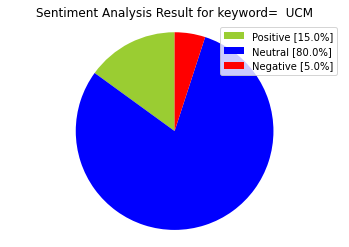

In [7]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [8]:
tweet_list.drop_duplicates(inplace = True)

# Extracting text values

In [9]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @MarvelBRNews: Capitão América decidido a i...,RT @MarvelBRNews: Capitão América decidido a i...
2,Meier works out of a bases loaded jam in the 7...,Meier works out of a bases loaded jam in the 7...
3,Elizabeth Olsen disse que não volta como Wanda...,Elizabeth Olsen disse que não volta como Wanda...
6,"@VozFriki @FanGeekBGMM Hombre, si fuese del UC...","@VozFriki @FanGeekBGMM Hombre, si fuese del UC..."
7,@MarvelBRNews o homem aranha faria o mesmo\nes...,@MarvelBRNews o homem aranha faria o mesmo\nes...
8,@Emiliosteinsimp Yo es la peli que más espero ...,@Emiliosteinsimp Yo es la peli que más espero ...
9,RT @BComplutense: ¡Participa en el sorteo para...,RT @BComplutense: ¡Participa en el sorteo para...
11,RT @IGeociencias: Esta semana en #GeocienciasE...,RT @IGeociencias: Esta semana en #GeocienciasE...
14,@MarvelSpain @Cines_Kinepolis Rocket es el alm...,@MarvelSpain @Cines_Kinepolis Rocket es el alm...
16,RT @jrftorres: Con motivo del centenario del p...,RT @jrftorres: Con motivo del centenario del p...


In [10]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @MarvelBRNews: Capitão América decidido a i...,capit o am rica decidido a ir sozinho pra cim...
2,Meier works out of a bases loaded jam in the 7...,meier works out of a bases loaded jam in the 7...
3,Elizabeth Olsen disse que não volta como Wanda...,elizabeth olsen disse que n o volta como wanda...
6,"@VozFriki @FanGeekBGMM Hombre, si fuese del UC...",hombre si fuese del ucm ya habr a 40 cue...
7,@MarvelBRNews o homem aranha faria o mesmo\nes...,o homem aranha faria o mesmo esse homem aran...
8,@Emiliosteinsimp Yo es la peli que más espero ...,yo es la peli que m s espero este a o y una ...
9,RT @BComplutense: ¡Participa en el sorteo para...,participa en el sorteo para estudiantes de ...
11,RT @IGeociencias: Esta semana en #GeocienciasE...,esta semana en geocienciasenelcole vamos a h...
14,@MarvelSpain @Cines_Kinepolis Rocket es el alm...,kinepolis rocket es el alma viva del grupo...
16,RT @jrftorres: Con motivo del centenario del p...,con motivo del centenario del prof e garc a...


In [11]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @MarvelBRNews: Capitão América decidido a i...,capit o am rica decidido a ir sozinho pra cim...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
2,Meier works out of a bases loaded jam in the 7...,meier works out of a bases loaded jam in the 7...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
3,Elizabeth Olsen disse que não volta como Wanda...,elizabeth olsen disse que n o volta como wanda...,0.0,0.0,negative,0.216,0.784,0.000,-0.2960
6,"@VozFriki @FanGeekBGMM Hombre, si fuese del UC...",hombre si fuese del ucm ya habr a 40 cue...,0.0,0.0,positive,0.000,0.725,0.275,0.5859
7,@MarvelBRNews o homem aranha faria o mesmo\nes...,o homem aranha faria o mesmo esse homem aran...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
8,@Emiliosteinsimp Yo es la peli que más espero ...,yo es la peli que m s espero este a o y una ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
9,RT @BComplutense: ¡Participa en el sorteo para...,participa en el sorteo para estudiantes de ...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
11,RT @IGeociencias: Esta semana en #GeocienciasE...,esta semana en geocienciasenelcole vamos a h...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000
14,@MarvelSpain @Cines_Kinepolis Rocket es el alm...,kinepolis rocket es el alma viva del grupo...,0.0,0.0,positive,0.000,0.870,0.130,0.2732
16,RT @jrftorres: Con motivo del centenario del p...,con motivo del centenario del prof e garc a...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000


In [12]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [13]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [14]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,9,69.23
positive,3,23.08
negative,1,7.69


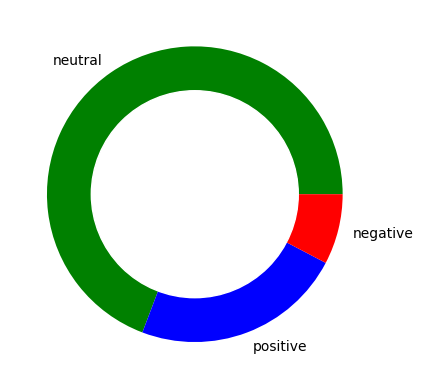

In [15]:
# create data for Pie Chart
pc = count_values_in_column(tw_list,"sentiment")
names= pc.index
size=pc["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [16]:
#Function to Create Wordcloud

def create_wordcloud(text):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white", width=600, height=400,               
                  max_words=300,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    
    plt.imshow(wc)
    plt.show()



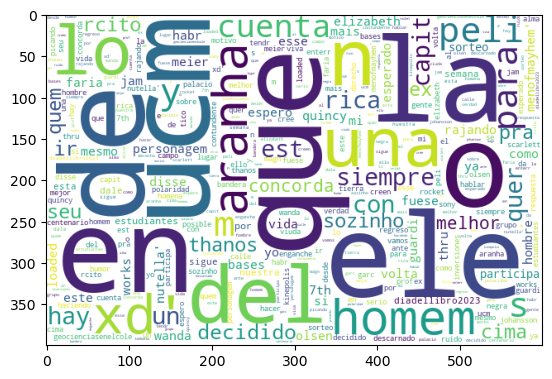

In [17]:
#Creating wordcloud for all tweets
create_wordcloud(tw_list["text"].values)

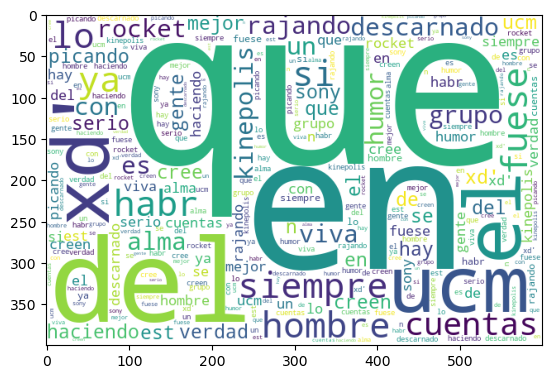

In [18]:
#Creating wordcloud for positive sentiment
create_wordcloud(tw_list_positive["text"].values)

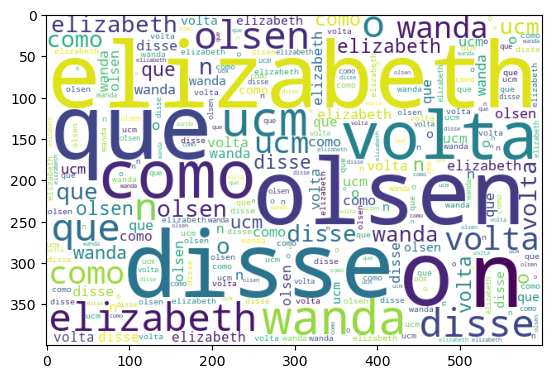

In [19]:
#Creating wordcloud for negative sentiment
create_wordcloud(tw_list_negative["text"].values)

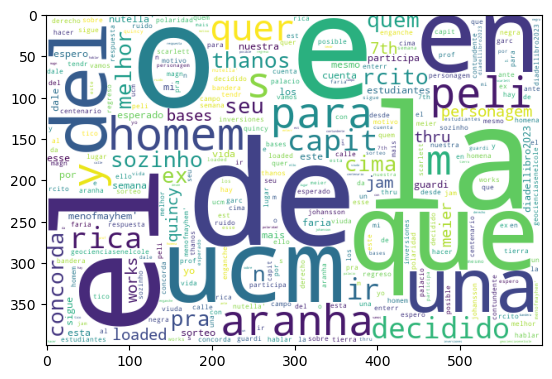

In [20]:
#Creating wordcloud for neutral sentiment
create_wordcloud(tw_list_neutral["text"].values)